In [1]:
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization
from keras import backend as k
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
(X, y), (x_test, y_test) = cifar10.load_data()

## Preprocess the data

In [3]:
def get_shape(d):
    print(f"The shape is : {d.shape}")
def get_x_shape(x_train, x_test):
    print(f"x shape: {x_train.shape}\nx_test shape: {x_test.shape}")
def get_y_shape(y_train, y_test):
    print(f"y shape: {y_train.shape}\nx_test shape: {y_test.shape}")

In [4]:
get_x_shape(X, x_test)
get_y_shape(y, y_test)

x shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y shape: (50000, 1)
x_test shape: (10000, 1)


### Input shape


In [5]:
in_shape = (32, 32, 3)

### Num of categories

In [6]:
df = pd.DataFrame(y)
categories = len(pd.unique(df[0]))
categories

10

In [7]:
y = tf.keras.utils.to_categorical(y, categories)
y_test = tf.keras.utils.to_categorical(y_test, categories)
get_y_shape(y, y_test)

y shape: (50000, 10)
x_test shape: (10000, 10)


### Normalizing:

In [8]:
X.max()

255

In [9]:
X = X.astype('float' ) / 255
x_test= x_test.astype('float' ) / 255
get_x_shape(X, x_test)

x shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


### Split X, y into train and validation

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=44)

## Create the model

In [20]:
kernal = (3, 3)
pool_size = (2, 2)
model = Sequential()
# Input and 1st hidden layer
model.add(Conv2D(32, kernal, activation='relu', input_shape=in_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

# 2nd hidden layer
model.add(Conv2D(64, kernal, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

# Final hidden layer and output layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))      
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(categories, activation='softmax'))
          
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 
model.summary()          


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_2 (Batc  (None, 13, 13, 64)      

## Train the model

In [23]:
batch_size = 128
epochs = 10
hist = model.fit(x_train, y_train, batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid))
model.save('fashion.h5')

Epoch 1/10
333/333 [==============================] - 25s 73ms/step - loss: 1.7237 - accuracy: 0.4400 - val_loss: 3.6160 - val_accuracy: 0.1365
Epoch 2/10
333/333 [==============================] - 24s 73ms/step - loss: 1.2052 - accuracy: 0.5797 - val_loss: 1.8927 - val_accuracy: 0.4053
Epoch 3/10
333/333 [==============================] - 24s 73ms/step - loss: 1.0509 - accuracy: 0.6312 - val_loss: 2.4067 - val_accuracy: 0.3595
Epoch 4/10
333/333 [==============================] - 26s 77ms/step - loss: 0.9705 - accuracy: 0.6587 - val_loss: 1.6233 - val_accuracy: 0.4751
Epoch 5/10
333/333 [==============================] - 25s 75ms/step - loss: 0.9181 - accuracy: 0.6794 - val_loss: 1.8392 - val_accuracy: 0.4705
Epoch 6/10
333/333 [==============================] - 25s 76ms/step - loss: 0.8698 - accuracy: 0.6947 - val_loss: 2.4607 - val_accuracy: 0.3540
Epoch 7/10
333/333 [==============================] - 25s 75ms/step - loss: 0.8266 - accuracy: 0.7116 - val_loss: 1.9207 - val_accuracy:

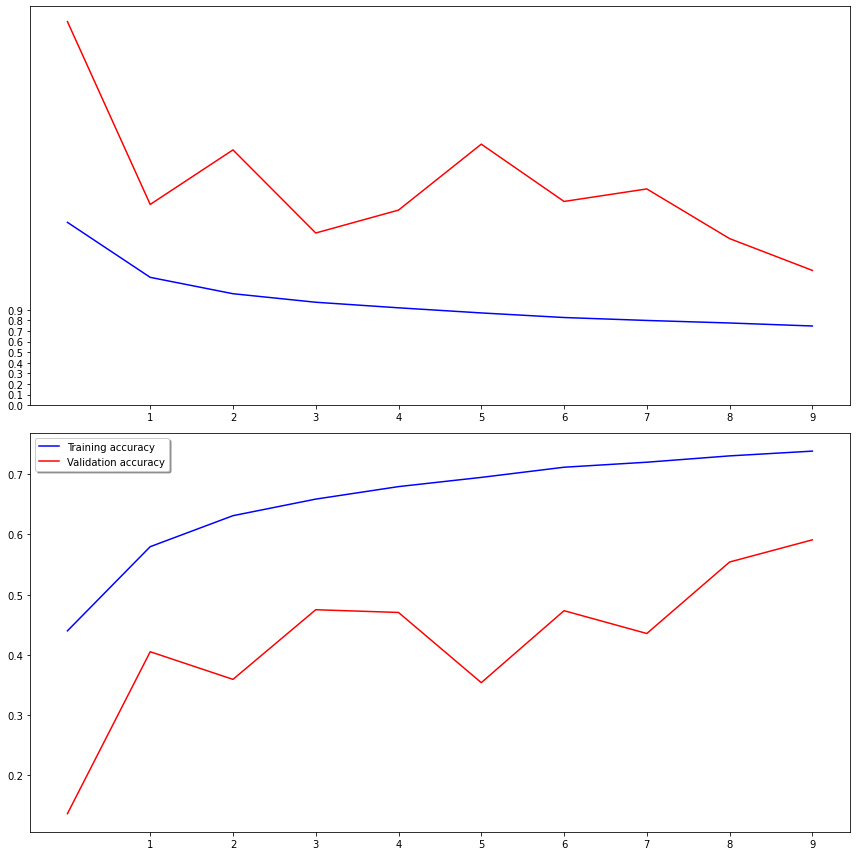

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(hist.history['loss'], color='b', label="Training loss")
ax1.plot(hist.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax2.plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))
legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

## Model evalution

In [43]:
score = model.evaluate(x_test, y_test, verbose=0)

In [44]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.835655927658081
Test accuracy: 0.710099995136261
